In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import re

## Первый датасет rent - чистка данных




In [ ]:
#uploaded = files.upload()

In [ ]:
df_rent = pd.read_csv("estate_cities.csv")

In [ ]:
df_rent

,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district
0,450000,"улица Шумкина, 20 ст1",Москва,1698,265,Универсальное помещение,https://msk.n1.ru/view/115904136/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
1,4097925,"улица Берсеневская набережная, 8 ст1",Москва,3249,1260,Универсальное помещение,https://msk.n1.ru/view/115813194/?open_card_kn,"улица Берсеневская набережная, 8 ст1, Москва, ...",Адрес не найден
2,68125,"улица Шумкина, 20 ст1",Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
3,65000,"улица Николая Озерова, 2",Москва,4333,15,Универсальное помещение,https://msk.n1.ru/view/115738288/?open_card_kn,"улица Николая Озерова, 2, Москва, Россия",район Покровское-Стрешнево
4,490000,"улица Новослободская, 50 ст2",Москва,1580,310,Универсальное помещение,https://msk.n1.ru/view/115137027/?open_card_kn,"улица Новослободская, 50 ст2, Москва, Россия",Тверской район
...,...,...,...,...,...,...,...,...,...
14575,100000,Громова,Екатеринбург,1000,100,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115624215/?ope...,"Громова, Екатеринбург, Россия",Новогромовское сельское поселение
14576,150000,Краснофлотцев,Екатеринбург,1428,105,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/114934584/?ope...,"Краснофлотцев, Екатеринбург, Россия",Орджоникидзевский район
14577,199500,Восточная,Екатеринбург,750,266,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/113846166/?ope...,"Восточная, Екатеринбург, Россия",Репьёвский сельсовет
14578,85000,Фурманова,Екатеринбург,1562,54,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115608931/?ope...,"Фурманова, Екатеринбург, Россия",Алматинская область


In [ ]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14580 entries, 0 to 14579
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rent, rub/month           14580 non-null  int64 
 1   full_address              14580 non-null  object
 2   city                      14580 non-null  object
 3   price_per_sqm, rub/month  14580 non-null  int64 
 4   square, m^2               14580 non-null  int64 
 5   type                      14580 non-null  object
 6   url                       14580 non-null  object
 7   OSM_address               14580 non-null  object
 8   district                  14580 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.0+ MB


Датасет rent содержит данные об объявлениях об аренде помещений в 7 городах-миллиониках России.

**Описание признаков:**
* `rent, rub/month` - арендная плата в рублях в месяц
* `full_address` - физический адрес помещения (улица, дом, строение)
* `city` - город, где находится помещение
* `price_per_sqm, rub/month` - цена за квадратный метр в месяц
* `square, m^2` - площадь помещения в квадратных метрах
* `type` - тип помещения
* `url` - ссылка на объявление
* `OSM_address` - полный физический адрес помещения с указанием города и страны
* `district` - название района города, где находится помещение

In [ ]:
df_rent = df_rent.rename(columns={'full_address': 'address'})
df_rent['address'] = df_rent['address'].str.split(',').str[0]

In [ ]:
df_rent.isna().sum()

,0
"rent, rub/month",0
address,0
city,0
"price_per_sqm, rub/month",0
"square, m^2",0
type,0
url,0
OSM_address,0
district,0


В признаках не содержится пропусков. В районах есть значение "Адрес не найден". Заменим на nan и удалим, потому что мы не можем провести анализ этих помещений


**Причины пропусков:**
1. В оригинальном объявлении владелец скрыл адрес, указав только район


Удалим строки с пропущенными адресами, так как адрес является важным признаком + пропуски составляют меньше процента

In [ ]:
df_rent = df_rent.replace({'Адрес не найден': np.nan})

In [ ]:
df_rent.isna().sum()

,0
"rent, rub/month",0
address,0
city,0
"price_per_sqm, rub/month",0
"square, m^2",0
type,0
url,0
OSM_address,0
district,853



---

Далее рассмотрим, есть ли аномалии в нашем датасете

In [ ]:
int_columns = ['rent, rub/month', 'price_per_sqm, rub/month', 'square, m^2']

for i in int_columns:
    print(f'В столбце {i} количество значений меньше или равно 0: {(df_rent[i] <= 0).sum}')

В столбце rent, rub/month количество значений меньше или равно 0: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
14575    False
14576    False
14577    False
14578    False
14579    False
Name: rent, rub/month, Length: 14580, dtype: bool>
В столбце price_per_sqm, rub/month количество значений меньше или равно 0: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
14575    False
14576    False
14577    False
14578    False
14579    False
Name: price_per_sqm, rub/month, Length: 14580, dtype: bool>
В столбце square, m^2 количество значений меньше или равно 0: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
14575    False
14576    False
14577    False
14578    False
14579    False
Name: square, m^2, Length: 14580, dtype: bool>


В нашем датасете нет площади и стоимостей меньше 0, так что аномалий в датасете нет



---

Рассмотрим выбросы

In [ ]:
df_rent.describe()

,"rent, rub/month","price_per_sqm, rub/month","square, m^2"
count,1.458000e+04,1.458000e+04,14580.000000
mean,1.052255e+07,5.167392e+03,364.060562
std,1.044013e+09,1.501926e+05,2513.037938
min,2.500000e+02,1.000000e+00,1.000000
25%,1.125000e+05,1.235750e+03,60.000000
50%,2.500205e+05,2.119000e+03,115.000000
75%,6.377775e+05,3.645000e+03,255.000000
max,1.258000e+11,1.700000e+07,220000.000000


<Axes: xlabel='city', ylabel='rent, rub/month'>

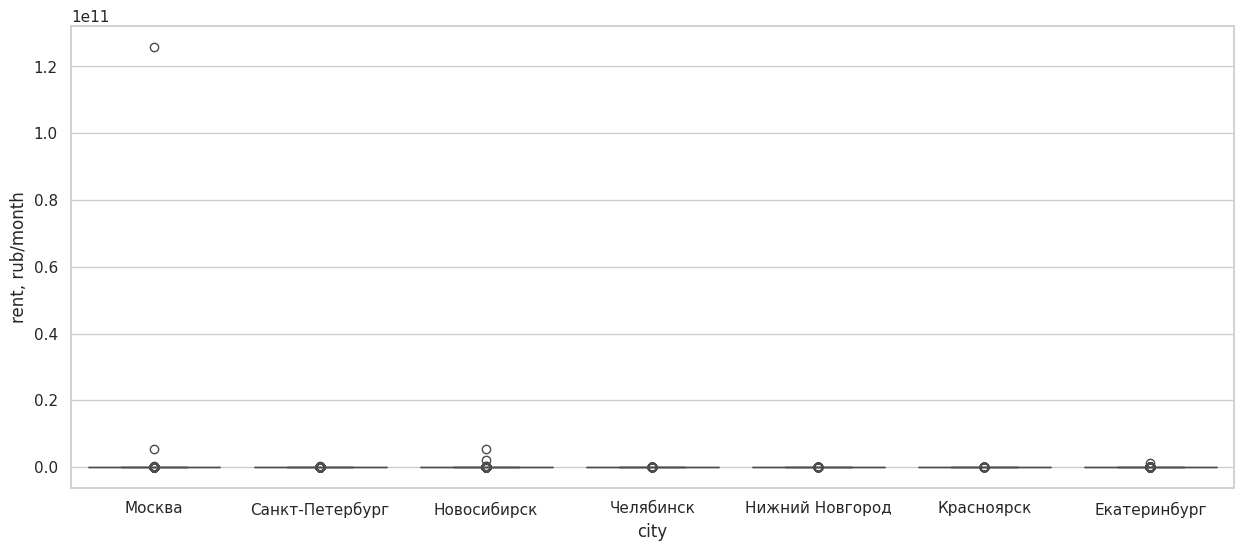

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='rent, rub/month')

<Axes: xlabel='city', ylabel='square, m^2'>

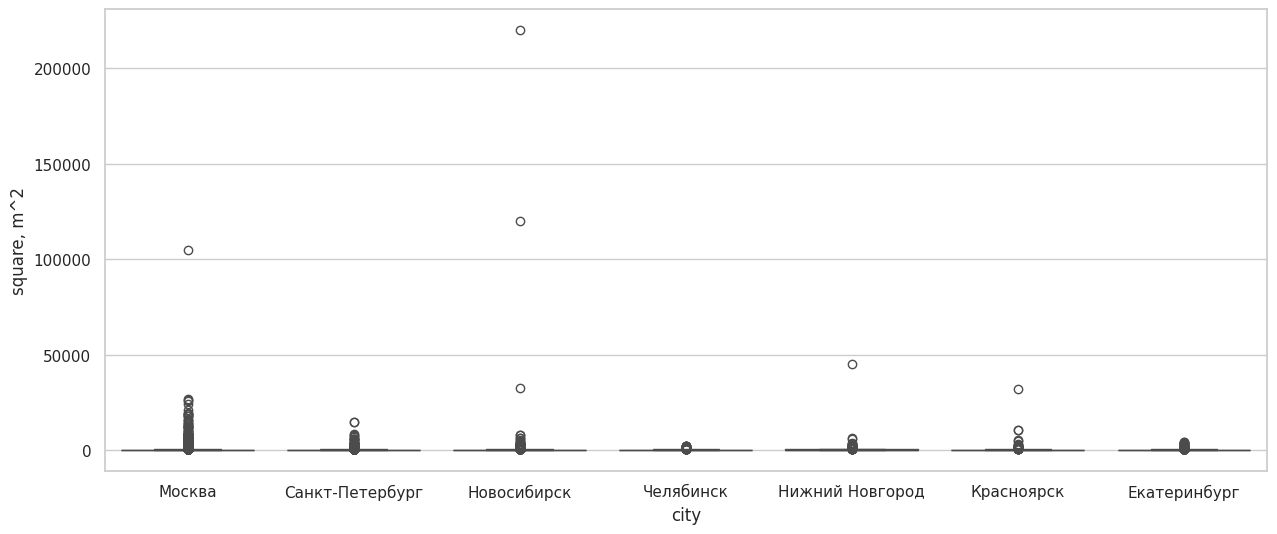

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='square, m^2')

boxplot практически невозможно разглядеть, можем заметить, что есть огромные выбросы - огромные цены на аренду. Например, в Санкт-Петербурге есть площадь с ценой около 1400000 рублей в месяц.
Клиент открывает первый бизнес и не готов вкладывать огромные сбережения, поэтому отбросим огромные цены - выбросы с помощью самого популярного способа удалять выбросы:

- Ниже первой квартили - `3 iqr` (межквартильное расстояние)
- Выше третьей квартили + `3 iqr` (межквартильное расстояние)

Аналогично для первого бизнеса тяжело обустраивать и содержать огромные помещения (идут расходы на мебель, коммунальные услуги, обеспечение, ремонт и т. п.), поэтому уберем выбросы с большими площадями, но поменяем константу на 5

In [ ]:
Q1_rent = df_rent['rent, rub/month'].describe()['25%']
Q3_rent = df_rent['rent, rub/month'].describe()['75%']
Q1_S = df_rent['square, m^2'].describe()['25%']
Q3_S = df_rent['square, m^2'].describe()['75%']

IQR_rent = Q3_rent - Q1_rent
IQR_S = Q3_S - Q1_S

In [ ]:
df_rent = df_rent[(df_rent['rent, rub/month'] < (Q3_rent + 3 * IQR_rent)) & (df_rent['square, m^2'] < (Q3_S + 5 * IQR_S))] # минимальные значения не убираем, т. к. нам выгодно мало тратить

In [ ]:
df_rent.describe()

,"rent, rub/month","price_per_sqm, rub/month","square, m^2"
count,1.343800e+04,13438.000000,13438.000000
mean,3.869580e+05,3066.900804,171.165575
std,4.237176e+05,3615.712513,190.289470
min,2.500000e+02,1.000000,1.000000
25%,1.030000e+05,1208.000000,56.000000
50%,2.300000e+05,2059.000000,103.000000
75%,5.000000e+05,3509.000000,205.000000
max,2.201000e+06,120000.000000,1225.000000


Между третьим квантилем и максимумом все еще большой разброс, который указывает, что есть выбросы

<Axes: xlabel='city', ylabel='rent, rub/month'>

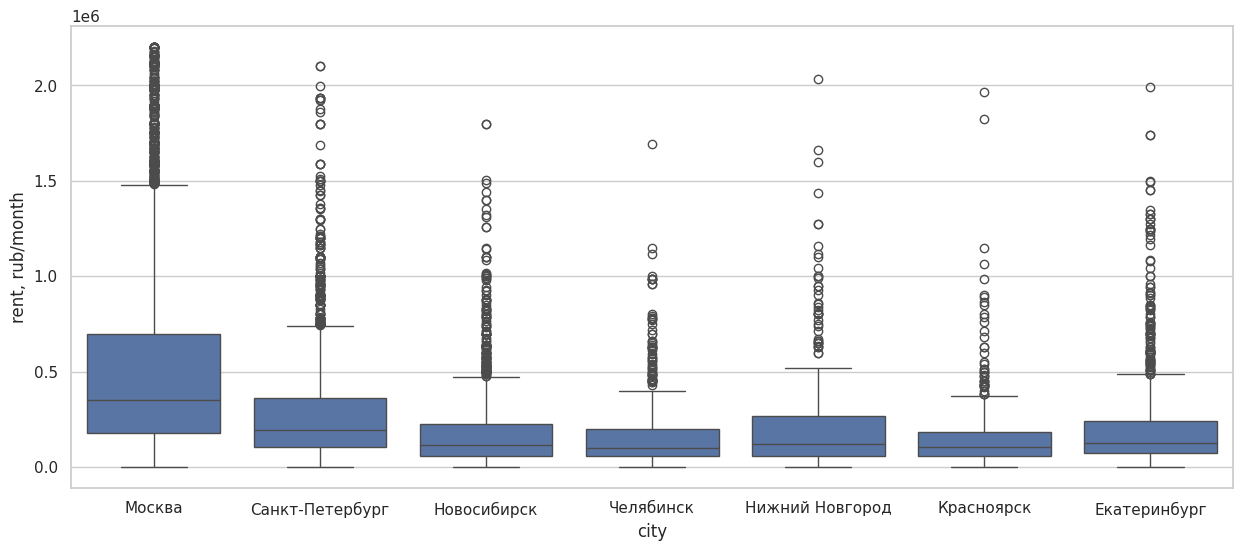

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='rent, rub/month')

Теперь выбросов с низкой ценой за m^2 нет, но есть много выбросов с высокой ценой. В таком случае тратитиься на аренду данных помещений не целесообазно для нашего клиента, поэтому в дальнейшем анализе мы не будем их рассматривать.

<Axes: xlabel='city', ylabel='square, m^2'>

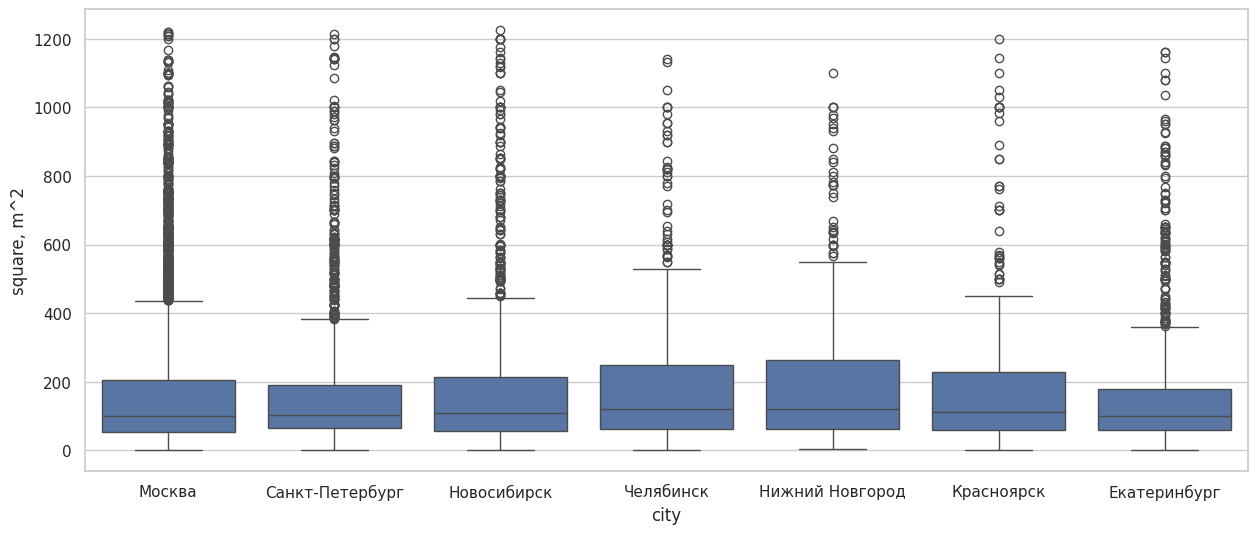

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_rent, x='city', y='square, m^2')

Теперь выбросов с маленькой площадью нет, но есть много выбросов с большой площадью. Данные помещения неудобны для открытия первой точки, поэтому далее мы не будем их рассматривать.

## Univariate analysis - rent



In [ ]:
df_rent

,"rent, rub/month",address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,district
0,450000,улица Шумкина,Москва,1698,265,Универсальное помещение,https://msk.n1.ru/view/115904136/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
2,68125,улица Шумкина,Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"улица Шумкина, 20 ст1, Москва, Россия",район Сокольники
3,65000,улица Николая Озерова,Москва,4333,15,Универсальное помещение,https://msk.n1.ru/view/115738288/?open_card_kn,"улица Николая Озерова, 2, Москва, Россия",район Покровское-Стрешнево
4,490000,улица Новослободская,Москва,1580,310,Универсальное помещение,https://msk.n1.ru/view/115137027/?open_card_kn,"улица Новослободская, 50 ст2, Москва, Россия",Тверской район
5,293601,Мира проспект,Москва,2667,110,Универсальное помещение,https://msk.n1.ru/view/114858057/?open_card_kn,"Мира проспект, 102 ст17, Москва, Россия",Донецкий район
...,...,...,...,...,...,...,...,...,...
14575,100000,Громова,Екатеринбург,1000,100,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115624215/?ope...,"Громова, Екатеринбург, Россия",Новогромовское сельское поселение
14576,150000,Краснофлотцев,Екатеринбург,1428,105,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/114934584/?ope...,"Краснофлотцев, Екатеринбург, Россия",Орджоникидзевский район
14577,199500,Восточная,Екатеринбург,750,266,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/113846166/?ope...,"Восточная, Екатеринбург, Россия",Репьёвский сельсовет
14578,85000,Фурманова,Екатеринбург,1562,54,Помещение под бар/ресторан,https://ekaterinburg.n1.ru/view/115608931/?ope...,"Фурманова, Екатеринбург, Россия",Алматинская область


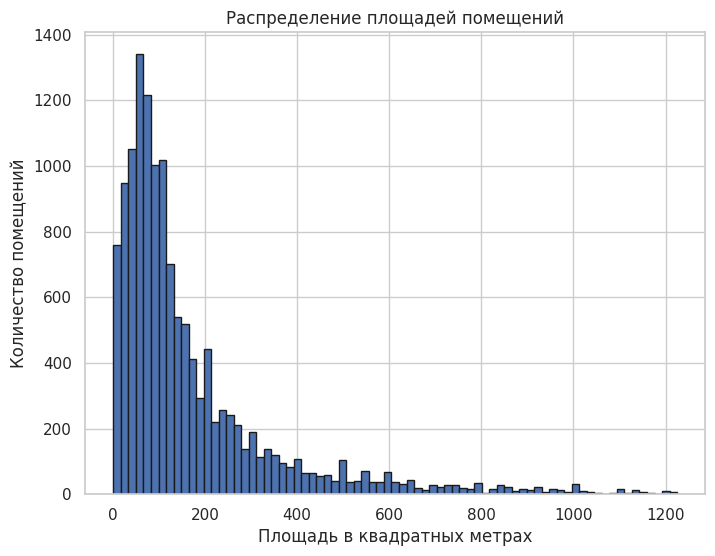

In [ ]:
figsize(8, 6)

plt.hist(df_rent['square, m^2'], bins = 75, edgecolor='k')

plt.xlabel('Площадь в квадратных метрах')
plt.ylabel('Количество помещений')
plt.title('Распределение площадей помещений')
plt.show()

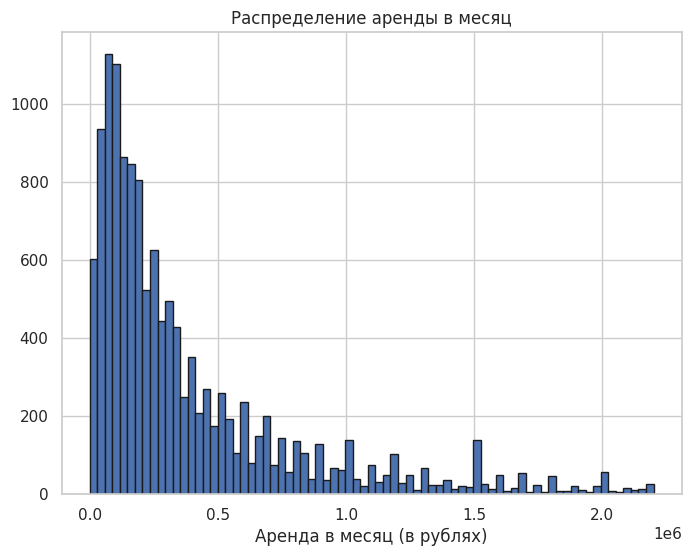

In [ ]:
figsize(8, 6)

plt.hist(df_rent['rent, rub/month'], bins = 75, edgecolor='k')

plt.xlabel('Аренда в месяц (в рублях)')
plt.title('Распределение аренды в месяц')
plt.show()

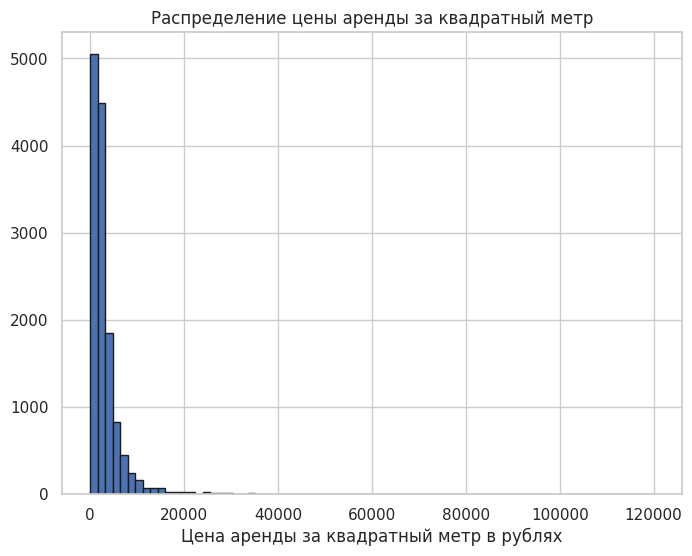

In [ ]:
figsize(8, 6)

plt.hist(df_rent['price_per_sqm, rub/month'], bins = 75, edgecolor='k')

plt.xlabel('Цена аренды за квадратный метр в рублях')
plt.title('Распределение цены аренды за квадратный метр')
plt.show()

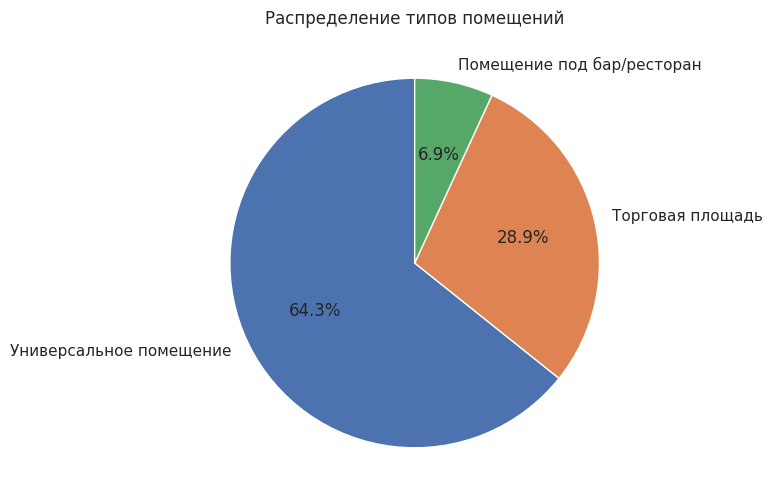

In [ ]:
plt.figure(figsize=(8, 6))

type_counts = df_rent['type'].value_counts()

plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Распределение типов помещений')
plt.show()

## Multivariate analysis - rent

In [ ]:
df_rent.groupby(['city', 'district']).agg({'rent, rub/month': ['mean', 'median', 'max', 'min'], 'price_per_sqm, rub/month': ['mean', 'median', 'max', 'min']})

rent, rub/month                    \
                                                   mean    median     max   
city         district                                                       
Екатеринбург Автономная Республика Крым   125000.000000  125000.0  125000   
             Айский сельсовет              59490.000000   59490.0   59490   
             Академический район          165835.532609  117753.0  760000   
             Алматинская область          182107.142857  143250.0  398500   
             Алтайский край               450000.000000  450000.0  450000   
...                                                 ...       ...     ...   
Челябинск    район Марфино                281600.000000  281600.0  463200   
             район Нагатинский Затон      236880.000000  236880.0  236880   
             район Перово                 110000.000000  110000.0  110000   
             район Сокол                  120000.000000  120000.0  120000   
             район Хамовники              148179.875000  110937.5  399594   

                                                price_per_sqm, rub/month  \
                                            min                     mean   
city         district                                                      
Екатеринбург Автономная Республика Крым  125000              1250.000000   
             Айский сельсовет             59490               900.000000   
             Академический район           4000              1525.880435   
             Алматинская область           6000              1514.357143   
             Алтайский край              450000               466.000000   
...                                         ...                      ...   
Челябинск    район Марфино               100000              1500.000000   
             район Нагатинский Затон     236880               450.000000   
             район Перово                110000               617.000000   
             район Сокол                 120000               150.000000   
             район Хамовники              40000               892.750000   

                                                             
                                         median   max   min  
city         district                                        
Екатеринбург Автономная Республика Крым  1250.0  1250  1250  
             Айский сельсовет             900.0   900   900  
             Академический район         1500.0  2536   500  
             Алматинская область         1406.0  3000   675  
             Алтайский край               466.0   466   466  
...                                         ...   ...   ...  
Челябинск    район Марфино               1500.0  2000  1000  
             район Нагатинский Затон      450.0   450   450  
             район Перово                 617.0   617   617  
             район Сокол                  150.0   150   150  
             район Хамовники              845.5  1600   416  

[1346 rows x 8 columns]

In [ ]:
ciry_distr_agg = df_rent.groupby(['city', 'district']).agg({'square, m^2': ['mean'], 'rent, rub/month': ['mean', 'median', 'max', 'min'], 'price_per_sqm, rub/month': ['mean', 'median', 'max', 'min']})

In [ ]:
cities = df_rent['city'].unique()

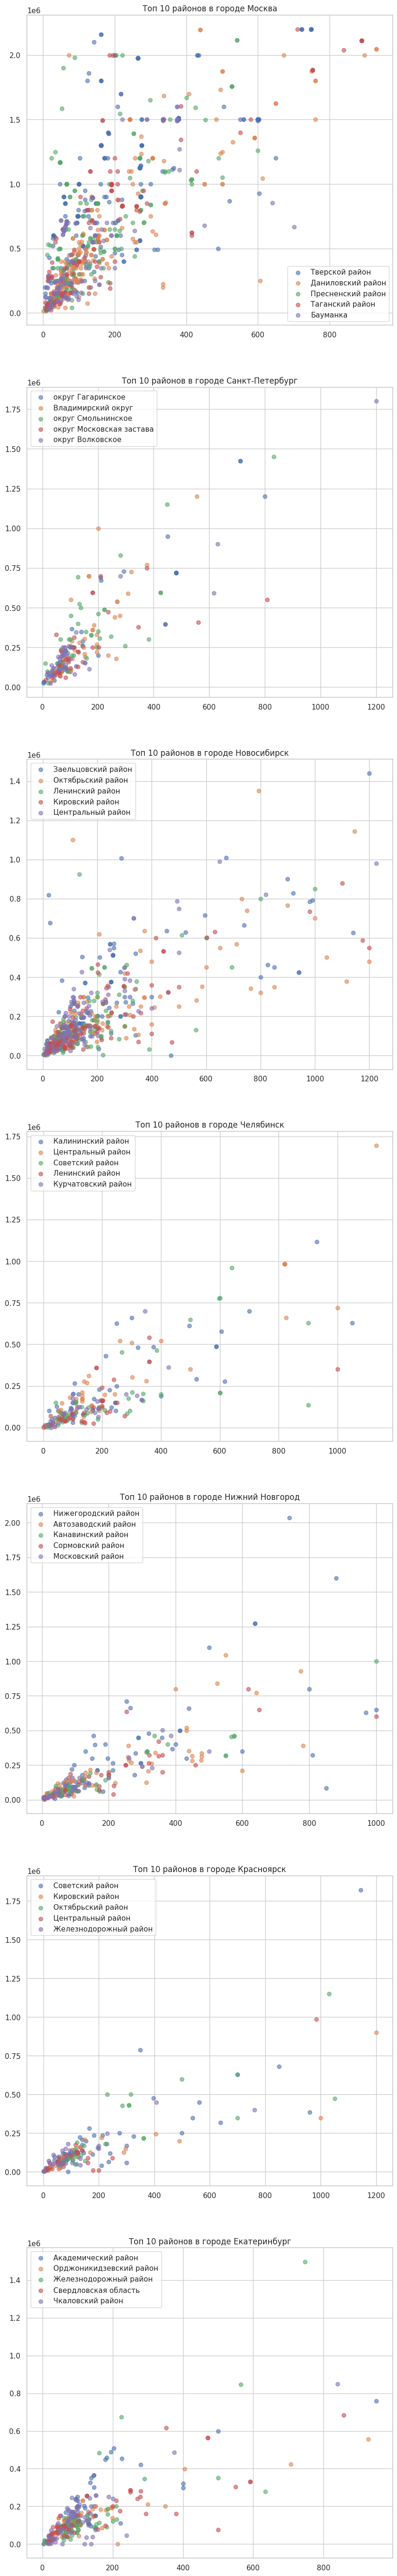

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(10, 70))
axes = axes.flatten()

for i, city in enumerate(cities):
    df_city = df_rent[df_rent['city'] == city]
    top_districts = df_city['district'].value_counts().head(5).index
    print()
    for district in top_districts:
        df_district = df_city[df_city['district'] == district]
        axes[i].scatter(df_district['square, m^2'], df_district['rent, rub/month'], label=district, alpha=0.6)

    axes[i].legend()
    axes[i].set_title(f'Топ 10 районов в городе {city}')

plt.show()

In [ ]:
def new_category(square):
    if 50 <= square < 120:
        return 'Средняя'
    elif 120 <= square < 300:
        return 'Большая'
    elif 300 <= square < 600:
        return 'Крупная'
    else:
        return 'Очень крупная'

In [ ]:
df_rent = df_rent[df_rent['square, m^2'] >= 50]
df_rent['square_category'] = df_rent['square, m^2'].apply(new_category)

/tmp/ipython-input-2584586023.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



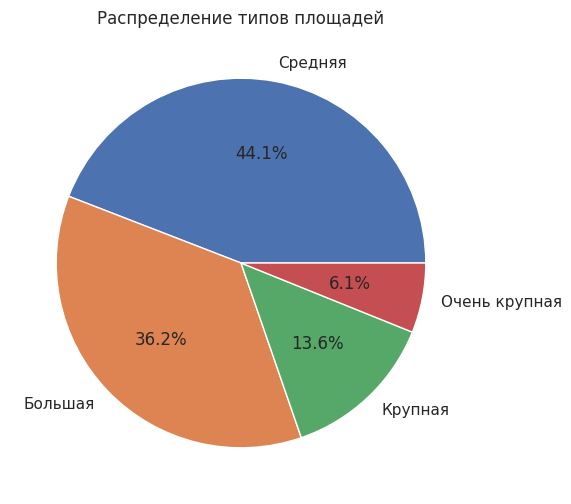

In [ ]:
plt.figure(figsize=(8, 6))

category_counts = df_rent['square_category'].value_counts()

plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')

plt.title('Распределение типов площадей')
plt.show()

In [ ]:
df_rent.groupby(['square_category', 'type']).agg({'rent, rub/month': ['mean', 'count']})

rent, rub/month      
                                                      mean count
square_category type                                            
Большая         Помещение под бар/ресторан    5.987866e+05   319
                Торговая площадь              5.754321e+05  1050
                Универсальное помещение       4.377308e+05  2494
Крупная         Помещение под бар/ресторан    1.014467e+06   121
                Торговая площадь              8.322685e+05   347
                Универсальное помещение       7.504299e+05   985
Очень крупная   Помещение под бар/ресторан    1.318455e+06    55
                Торговая площадь              1.177830e+06   129
                Универсальное помещение       1.043949e+06   468
Средняя         Помещение под бар/ресторан    2.771539e+05   325
                Торговая площадь              2.836455e+05  1452
                Универсальное помещение       2.116604e+05  2935

In [ ]:
df_rent.groupby(['city', 'square_category']).agg({'rent, rub/month': ['mean', 'count']})

rent, rub/month      
                                           mean count
city            square_category                      
Екатеринбург    Большая            2.408858e+05   304
                Крупная            4.916869e+05   104
                Очень крупная      7.720899e+05    57
                Средняя            1.217536e+05   485
Красноярск      Большая            1.534319e+05   104
                Крупная            3.584265e+05    51
                Очень крупная      5.777491e+05    22
                Средняя            9.886511e+04   130
Москва          Большая            6.807114e+05  2125
                Крупная            1.077030e+06   770
                Очень крупная      1.437862e+06   312
                Средняя            3.391197e+05  2478
Нижний Новгород Большая            2.181377e+05   148
                Крупная            4.175399e+05    79
                Очень крупная      8.244217e+05    30
                Средняя            9.083968e+04   144
Новосибирск     Большая            2.200079e+05   471
                Крупная            3.598569e+05   169
                Очень крупная      6.681970e+05    96
                Средняя            1.072859e+05   518
Санкт-Петербург Большая            3.521037e+05   521
                Крупная            6.717943e+05   188
                Очень крупная      1.013947e+06    96
                Средняя            1.647987e+05   753
Челябинск       Большая            1.677104e+05   190
                Крупная            3.466782e+05    92
                Очень крупная      5.505729e+05    39
                Средняя            8.902791e+04   204

In [ ]:
global_group = df_rent.groupby(['city', 'square_category', 'type']).agg({'rent, rub/month': ['mean', 'count']})

In [ ]:
city_group = df_rent.groupby('city').agg({'rent, rub/month': ['mean']})

In [ ]:
for i, city in enumerate(df_rent['city'].unique()):
    print('|' * 100)
    print('ГОРОД:')
    print(city.upper())
    print(global_group.loc[city])
    print('-'* 50)
    print(global_group.loc[city, ('rent, rub/month', 'mean')] - city_group.values[i])

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
ГОРОД:
МОСКВА
                                           rent, rub/month      
                                                      mean count
square_category type                                            
Большая         Помещение под бар/ресторан    8.316913e+05   179
                Торговая площадь              7.701232e+05   631
                Универсальное помещение       6.172558e+05  1315
Крупная         Помещение под бар/ресторан    1.271976e+06    71
                Торговая площадь              1.131802e+06   174
                Универсальное помещение       1.032512e+06   525
Очень крупная   Помещение под бар/ресторан    1.569982e+06    31
                Торговая площадь              1.478834e+06    66
                Универсальное помещение       1.406235e+06   215
Средняя         Помещение под бар/ресторан    3.756420e+05   186
                Торговая площадь        

In [ ]:
df_rent.groupby(['city', 'square_category']).agg({'rent, rub/month': ['mean', 'count']}).sort_values(('rent, rub/month', 'mean'))

rent, rub/month      
                                           mean count
city            square_category                      
Челябинск       Средняя            8.902791e+04   204
Нижний Новгород Средняя            9.083968e+04   144
Красноярск      Средняя            9.886511e+04   130
Новосибирск     Средняя            1.072859e+05   518
Екатеринбург    Средняя            1.217536e+05   485
Красноярск      Большая            1.534319e+05   104
Санкт-Петербург Средняя            1.647987e+05   753
Челябинск       Большая            1.677104e+05   190
Нижний Новгород Большая            2.181377e+05   148
Новосибирск     Большая            2.200079e+05   471
Екатеринбург    Большая            2.408858e+05   304
Москва          Средняя            3.391197e+05  2478
Челябинск       Крупная            3.466782e+05    92
Санкт-Петербург Большая            3.521037e+05   521
Красноярск      Крупная            3.584265e+05    51
Новосибирск     Крупная            3.598569e+05   169
Нижний Новгород Крупная            4.175399e+05    79
Екатеринбург    Крупная            4.916869e+05   104
Челябинск       Очень крупная      5.505729e+05    39
Красноярск      Очень крупная      5.777491e+05    22
Новосибирск     Очень крупная      6.681970e+05    96
Санкт-Петербург Крупная            6.717943e+05   188
Москва          Большая            6.807114e+05  2125
Екатеринбург    Очень крупная      7.720899e+05    57
Нижний Новгород Очень крупная      8.244217e+05    30
Санкт-Петербург Очень крупная      1.013947e+06    96
Москва          Крупная            1.077030e+06   770
                Очень крупная      1.437862e+06   312

вывод: очень крупные в бюджет не вписываются, НАХУЙ!!

In [ ]:
df_rent = df_rent[df_rent['square_category'] != 'Очень крупная']

In [ ]:
df_rent.columns

Index(['rent, rub/month', 'address', 'city', 'price_per_sqm, rub/month',
       'square, m^2', 'type', 'url', 'OSM_address', 'district',
       'square_category'],
      dtype='object')

кодирование

In [ ]:
df_rent['square_category'].unique()

array(['Большая', 'Крупная', 'Средняя'], dtype=object)

In [ ]:
label_enconding = {'Средняя': 1, 'Большая': 2, 'Крупная': 3}

df_rent['square_category_encoding'] = df_rent['square_category'].map(label_enconding)

In [ ]:
list_to_corr = ['rent, rub/month', 'price_per_sqm, rub/month',
                'square, m^2', 'square_category']

<Axes: >

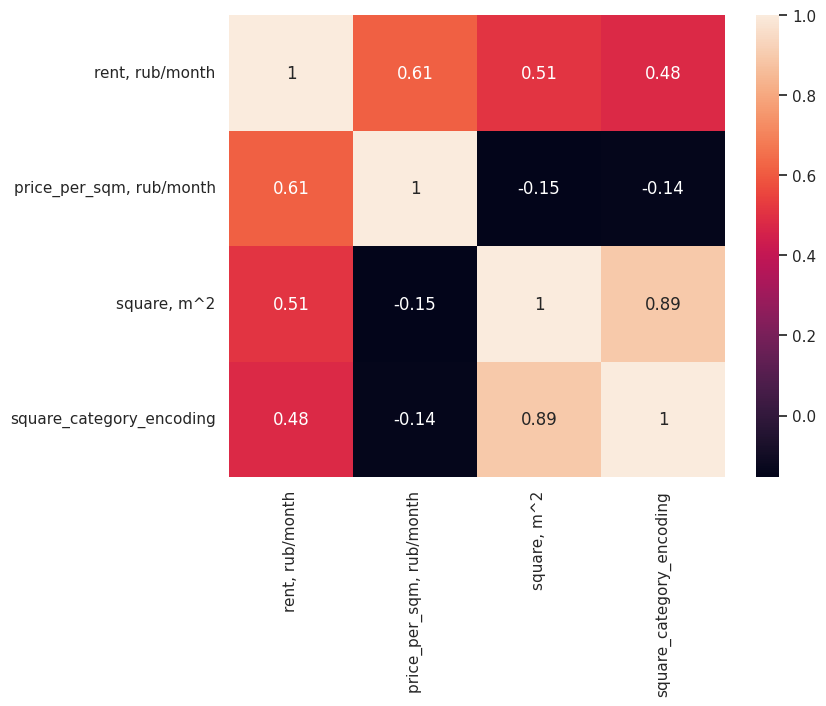

In [ ]:
sns.heatmap(df_rent.corr(numeric_only = True), annot=True)

In [ ]:
df_rent.columns

Index(['rent, rub/month', 'address', 'city', 'price_per_sqm, rub/month',
       'square, m^2', 'type', 'url', 'OSM_address', 'district',
       'square_category', 'square_category_encoding'],
      dtype='object')

In [ ]:
df_rent['address'].sample(10)

,address
11293,улица Вилюйская
12047,Победы проспект
6162,улица Бутлерова
4800,улица Смольная
5226,улица Дмитровка Б.
6328,улица Большая Садовая
3968,Вернадского проспект
1909,Автозаводский 2-й проезд
4157,улица Новокосинская
9974,проспект Старорусский
